<a href="https://colab.research.google.com/github/HernandezAna/redessociales/blob/main/AnalisisRedesSociales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAMOS LIBRERIAS

In [80]:
pip install googletrans==4.0.0-rc1

In [81]:
import kagglehub
import os
import pandas as pd # Necesario para el paso final
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTAMOS CONJUNTO DE DATOS DIRECTO DE KAGLE
[Conjunto de datos de redes sociales](https://www.kaggle.com/datasets/jocelyndumlao/social-media-and-consumer-behavior-2025)

In [82]:

# Download latest version

path = kagglehub.dataset_download("jocelyndumlao/social-media-and-consumer-behavior-2025")
print("Path to dataset files:", path)
# Asume que 'path' es la ruta principal de descarga
# Ejemplo: path = '/content/kaggle/jocelyndumlao/social-media-and-consumer-behavior-2025/1'

contenido_inicial = os.listdir(path)
print("Contenido inicial (debería ser la subcarpeta):", contenido_inicial)

# Asumimos que el primer elemento de la lista es la subcarpeta
if contenido_inicial:
    nombre_subcarpeta = contenido_inicial[0]

    # Construir la ruta a la subcarpeta
    nueva_ruta = os.path.join(path, nombre_subcarpeta)
    print(f"\nSe ha detectado una subcarpeta: **{nombre_subcarpeta}**")

# Listar el contenido de la subcarpeta
archivos_finales = os.listdir(nueva_ruta)
print("\nArchivos dentro de la subcarpeta:")
for archivo in archivos_finales:
    print(archivo)


nombre_archivo_csv='Impacto dos Algoritmos das Redes Sociais no Comportamento de Consumo em Rondon do Pará.csv'
# Unir la ruta de la subcarpeta con el nombre del archivo CSV
ruta_completa_csv = os.path.join(nueva_ruta, nombre_archivo_csv)

# Cargar el archivo en un DataFrame de Pandas
try:
    df_redesSociales = pd.read_csv(ruta_completa_csv)
    print("\n¡Carga exitosa del DataFrame!")
except FileNotFoundError:
    print(f"\nERROR: No se encontró el archivo '{nombre_archivo_csv}' en la ruta: {nueva_ruta}. Verifica el nombre.")

Using Colab cache for faster access to the 'social-media-and-consumer-behavior-2025' dataset.
Path to dataset files: /kaggle/input/social-media-and-consumer-behavior-2025
Contenido inicial (debería ser la subcarpeta): ['Dataset on the Impact of Social Media Algorithms o']

Se ha detectado una subcarpeta: **Dataset on the Impact of Social Media Algorithms o**

Archivos dentro de la subcarpeta:
Impacto dos Algoritmos das Redes Sociais no Comportamento de Consumo em Rondon do Pará.csv

¡Carga exitosa del DataFrame!


# PREPROCESAMOS LA INFORMACIÓN

In [83]:
df_redesSociales

,Carimbo de data/hora,Caracterização Sociodemográficas.,2- Sexo:,3- Escolaridade,4- Ocupação principal:,5- Renda mensal pessoal aproximada:,Uso de Redes Sociais,7- Tempo médio diário de uso das redes sociais,8- Com que frequência você visualiza anúncios nas redes sociais?,9- Você já realizou alguma compra após ver um anúncio nas redes sociais?,...,19- Já comprei produtos com base em recomendações de influenciadores nas redes sociais.,Comportamento de Consumo Online,21- O preço é o principal fator que me leva a optar por compras online.,22- A praticidade das compras online me faz comprar com mais frequência.,23- Considero as avaliações e comentários de outros consumidores antes de comprar.,24- Já deixei de comprar em loja física porque encontrei melhor oferta nas redes sociais.,Comércio Local e Percepções Finais,26- Gostaria que as lojas locais utilizassem mais as redes sociais para divulgar seus produtos.,"27- Se as lojas locais anunciassem de forma personalizada, eu compraria delas.",28- As redes sociais podem ser usadas de forma positiva para fortalecer o comércio local.
0,2025/10/14 4:26:09 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Estudante,Até 1 salário mínimo,Instagram;TikTok,Entre 1 e 3 horas,Às vezes,Sim,...,Concordo totalmente,Concordo parcialmente,Concordo parcialmente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
1,2025/10/14 4:28:54 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Médio,Trabalhador assalariado,De 1 a 2 salários,Instagram;TikTok,Entre 1 e 3 horas,Raramente,Não,...,Concordo totalmente,Discordo totalmente,Concordo totalmente,Concordo totalmente,Discordo totalmente;Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Discordo parcialmente,Concordo totalmente
2,2025/10/14 4:32:40 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Médio,Desempregado,Até 1 salário mínimo,Instagram;TikTok;Facebook;YouTube,Entre 3 e 5 horas,Muito frequentemente,Sim,...,Concordo levemente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Discordo levemente,Concordo totalmente
3,2025/10/14 4:33:54 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Estudante,Até 1 salário mínimo,Instagram,Entre 1 e 3 horas,Frequentemente,Sim,...,Concordo levemente,Concordo totalmente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo parcialmente,Concordo totalmente
4,2025/10/14 4:35:07 PM GMT-3,de 30 a 39 anos,Feminino,Ensino Superior,Trabalhador assalariado,De 1 a 2 salários,Instagram;TikTok,Mais de 5 horas,Frequentemente,Sim,...,Concordo levemente,Concordo levemente,Concordo totalmente,Concordo levemente,Concordo totalmente,Concordo totalmente,Discordo levemente,Concordo parcialmente,Concordo totalmente,Concordo totalmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2025/10/23 3:42:52 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Trabalhador assalariado,Até 1 salário mínimo,Instagram,Mais de 5 horas,Raramente,Sim,...,Discordo levemente,Concordo parcialmente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo levemente,Concordo totalmente,Concordo parcialmente,Concordo totalmente
90,2025/10/24 12:56:40 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Trabalhador assalariado,De 2 a 3 salários,Instagram,Entre 1 e 3 horas,Muito frequentemente,Sim,...,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo parcialmente,Concordo totalmente,Concordo parcialmente,Concordo totalmente
91,2025/10/27 3:23:46 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Estudante,Acima de 3 salários,Instagram,Entre 3 e 5 horas,Frequentemente,Sim,...,Concordo levemente,Concordo totalmente,Concordo totalmente,Concordo totalme

In [85]:
#Quitamos los indices del DF
df_redesSociales=df_redesSociales.reset_index();

### Renombrando las columnas del DataFrame

Para facilitar el análisis y la lectura de los datos, vamos a renombrar las columnas del DataFrame `df_redesSociales` con nombres más concisos y descriptivos.

In [92]:
column_rename_mapping = {
    'index': 'ID_Respuesta',
    'Carimbo de data/hora': 'Fecha_Hora',
    'Caracterização Sociodemográficas.': 'Rango_Edad',
    '2- Sexo:': 'Sexo',
    '3- Escolaridade': 'Nivel_Escolaridad',
    '4-  Ocupação principal:': 'Ocupacion_Principal',
    '5- Renda mensal pessoal aproximada:': 'Ingreso_Mensual_Aproximado',
    'Uso de Redes Sociais': 'Redes_Sociales_Usadas',
    '7- Tempo médio diário de uso das redes sociais': 'Tiempo_Diario_Redes_Sociales',
    '8- Com que frequência você visualiza anúncios nas redes sociais?': 'Frecuencia_Anuncios_Redes',
    '9- Você já realizou alguma compra após ver um anúncio nas redes sociais?': 'Compra_Tras_Anuncio',
    'Influência dos Algoritmos e Anúncios Personalizados': 'Influencia_Algoritmos_Anuncios',
    '11- Percebo que os anúncios são adaptados ao meu comportamento de navegação.': 'Anuncios_Adaptados_Comportamiento',
    '12- Os algoritmos me fazem ver produtos que despertam meu interesse de compra.': 'Algoritmos_motivan_Compra',
    '13- Sinto que os algoritmos \"conhecem\" meus gostos e preferências.': 'Algoritmos_Preferencias',
    '14- O conteúdo das redes sociais influencia minhas decisões de compra?': 'Influencia_Contenido_Redes',
    '15- Os anúncios personalizados aumentam minha probabilidade de comprar produtos.': 'Anuncios_Personalizados_Aumentan_Compra',
    'Influência de Influenciadores Digitais': 'Influencia_Influencers',
    '17- As recomendações de influenciadores afetam minhas decisões de compra.': 'Influencers_motivan_Compra',
    '18- Confio mais em produtos recomendados por influenciadores do que em propagandas tradicionais.': 'Influencers_vs_Propaganda',
    '19- Já comprei produtos com base em recomendações de influenciadores nas redes sociais.': 'Compra_Por_Recomendacion_influencers',
    'Comportamento de Consumo Online': 'Comportamiento_Consumo_Online',
    '21- O preço é o principal fator que me leva a optar por compras online.': 'Precio_Principal_Fator_Compras',
    '22- A praticidade das compras online me faz comprar com mais frequência.': 'Aumento_Frecuencia_Compras_Online',
    '23- Considero as avaliações e comentários de outros consumidores antes de comprar.': 'comentarios_Antes_Compra',
    '24- Já deixei de comprar em loja física porque encontrei melhor oferta nas redes sociais.': 'NO_compra_Fisica_Por_Redes_Sociales',
    'Comércio Local e Percepções Finais': 'Percepcion_comercio_local',
    '26- Gostaria que as lojas locais utilizassem mais as redes sociais para divulgar seus produtos.': 'divulgación_en_Redes_Sociales',
    '27- Se as lojas locais anunciassem de forma personalizada, eu compraria delas.': 'Compra_a_los negocios_Anunciados',
    '28- As redes sociais podem ser usadas de forma positiva para fortalecer o comércio local.': 'Redes_Sociales_Fortalecen_Comercio_Local'
}

# Renombrar las columnas
df_redesSociales = df_redesSociales.rename(columns=column_rename_mapping)

# Opcional: Eliminar las columnas que eran solo encabezados si no se consideran útiles como tal.
# Por ahora, las mantendré renombradas para no perder información.
# Si quieres eliminarlas, puedes usar:
# df_redesSociales = df_redesSociales.drop(columns=[
#     'Seccion_Influencia_Algoritmos_Anuncios',
#     'Seccion_Influencia_Influenciadores_Digitales',
#     'Seccion_Comportamiento_Consumo_Online',
#     'Seccion_Comercio_Local_Percepciones_Finais'
# ])

# Mostrar las nuevas columnas para verificar
print("Nuevas columnas del DataFrame:\n")
for col in df_redesSociales.columns:
    print(col)

# Mostrar las primeras filas con las nuevas columnas
print("\nPrimeras 5 filas del DataFrame con columnas renombradas:\n")
display(df_redesSociales.head())
valores_a_eliminar = [
    "Até 1 salário mínimo;De 1 a 2 salários",
    "De 1 a 2 salários;De 2 a 3 salários"
]

df_redesSociales = df_redesSociales[
    ~df_redesSociales['Ingreso_Mensual_Aproximado'].isin(valores_a_eliminar)
]
df_redesSociales = df_redesSociales[
    ~df_redesSociales['Redes_Sociales_Usadas'].str.contains('WhatsApp|Whatszap', case=False, na=False)
]



Nuevas columnas del DataFrame:

level_0
ID_Respuesta
Fecha_Hora
Rango_Edad
Sexo
Nivel_Escolaridad
Ocupacion_Principal
Ingreso_Mensual_Aproximado
Redes_Sociales_Usadas
Tiempo_Diario_Redes_Sociales
Frecuencia_Anuncios_Redes
Compra_Tras_Anuncio
Influencia_Algoritmos_Anuncios
Anuncios_Adaptados_Comportamiento
Algoritmos_motivan_Compra
Algoritmos_Preferencias
Influencia_Contenido_Redes
Anuncios_Personalizados_Aumentan_Compra
Influencia_Influencers
Influencers_motivan_Compra
Influencers_vs_Propaganda
Compra_Por_Recomendacion_influencers
Comportamiento_Consumo_Online
Precio_Principal_Fator_Compras
Aumento_Frecuencia_Compras_Online
comentarios_Antes_Compra
NO_compra_Fisica_Por_Redes_Sociales
Percepcion_comercio_local
divulgación_en_Redes_Sociales
Compra_a_los negocios_Anunciados
Redes_Sociales_Fortalecen_Comercio_Local
lista_redes

Primeras 5 filas del DataFrame con columnas renombradas:



,level_0,ID_Respuesta,Fecha_Hora,Rango_Edad,Sexo,Nivel_Escolaridad,Ocupacion_Principal,Ingreso_Mensual_Aproximado,Redes_Sociales_Usadas,Tiempo_Diario_Redes_Sociales,...,Comportamiento_Consumo_Online,Precio_Principal_Fator_Compras,Aumento_Frecuencia_Compras_Online,comentarios_Antes_Compra,NO_compra_Fisica_Por_Redes_Sociales,Percepcion_comercio_local,divulgación_en_Redes_Sociales,Compra_a_los negocios_Anunciados,Redes_Sociales_Fortalecen_Comercio_Local,lista_redes
0,0,0,2025/10/14 4:26:09 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Estudante,Até 1 salário mínimo,Instagram;TikTok,Entre 1 e 3 horas,...,Concordo parcialmente,Concordo parcialmente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,"[Instagram, TikTok]"
1,1,1,2025/10/14 4:28:54 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Médio,Trabalhador assalariado,De 1 a 2 salários,Instagram;TikTok,Entre 1 e 3 horas,...,Discordo totalmente,Concordo totalmente,Concordo totalmente,Discordo totalmente;Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Discordo parcialmente,Concordo totalmente,"[Instagram, TikTok]"
2,2,2,2025/10/14 4:32:40 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Médio,Desempregado,Até 1 salário mínimo,Instagram;TikTok;Facebook;YouTube,Entre 3 e 5 horas,...,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Discordo levemente,Concordo totalmente,"[Instagram, TikTok, Facebook, YouTube]"
3,3,3,2025/10/14 4:33:54 PM GMT-3,de 18 a 29 anos,Feminino,Ensino Superior,Estudante,Até 1 salário mínimo,Instagram,Entre 1 e 3 horas,...,Concordo totalmente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo parcialmente,Concordo totalmente,[Instagram]
4,4,4,2025/10/14 4:35:07 PM GMT-3,de 30 a 39 anos,Feminino,Ensino Superior,Trabalhador assalariado,De 1 a 2 salários,Instagram;TikTok,Mais de 5 horas,...,Concordo levemente,Concordo totalmente,Concordo levemente,Concordo totalmente,Concordo totalmente,Discordo levemente,Concordo parcialmente,Concordo totalmente,Concordo totalmente,"[Instagram, TikTok]"


#Generamos un diccionario con las preguntas y los nombres de la columnas de cada pregunta

In [93]:
from googletrans import Translator

def translate_text_pt_es(text):
    translator = Translator()
    try:
        translated = translator.translate(text, src='pt', dest='es')
        return translated.text
    except Exception as e:
        # Fallback for keys that might not be Portuguese or cause translation errors
        return text # Return original if translation fails

# Existing mapping from original/Portuguese to new Spanish names
# This is assumed to be defined from a previous step, but re-defining for clarity
column_rename_mapping = {
    'index': 'ID_Respuesta',
    'Carimbo de data/hora': 'Fecha_Hora',
    'Caracterização Sociodemográficas.': 'Rango_Edad',
    '2- Sexo:': 'Sexo',
    '3- Escolaridade': 'Nivel_Escolaridad',
    '4-  Ocupação principal:': 'Ocupacion_Principal',
    '5- Renda mensal pessoal aproximada:': 'Ingreso_Mensual_Aproximado',
    'Uso de Redes Sociais': 'Redes_Sociales_Usadas',
    '7- Tempo médio diário de uso das redes sociais': 'Tiempo_Diario_Redes_Sociales',
    '8- Com que frequência você visualiza anúncios nas redes sociais?': 'Frecuencia_Anuncios_Redes',
    '9- Você já realizou alguma compra após ver um anúncio nas redes sociais?': 'Compra_Tras_Anuncio',
    'Influência dos Algoritmos e Anúncios Personalizados': 'Influencia_Algoritmos_Anuncios',
    '11- Percebo que os anúncios são adaptados ao meu comportamento de navegação.': 'Anuncios_Adaptados_Comportamiento',
    '12- Os algoritmos me fazem ver produtos que despertam meu interesse de compra.': 'Algoritmos_motivan_Compra',
    '13- Sinto que os algoritmos \"conhecem\" meus gostos e preferências.': 'Algoritmos_Preferencias',
    '14- O conteúdo das redes sociais influencia minhas decisões de compra?': 'Influencia_Contenido_Redes',
    '15- Os anúncios personalizados aumentam minha probabilidade de comprar produtos.': 'Anuncios_Personalizados_Aumentan_Compra',
    'Influência de Influenciadores Digitais': 'Influencia_Influencers',
    '17- As recomendações de influenciadores afetam minhas decisões de compra.': 'Influencers_motivan_Compra',
    '18- Confio mais em produtos recomendados por influenciadores do que em propagandas tradicionais.': 'Influencers_vs_Propaganda',
    '19- Já comprei produtos com base em recomendações de influenciadores nas redes sociais.': 'Compra_Por_Recomendacion_influencers',
    'Comportamento de Consumo Online': 'Comportamiento_Consumo_Online',
    '21- O preço é o principal fator que me leva a optar por compras online.': 'Precio_Principal_Fator_Compras',
    '22- A praticidade das compras online me faz comprar com mais frequência.': 'Aumento_Frecuencia_Compras_Online',
    '23- Considero as avaliações e comentários de outros consumidores antes de comprar.': 'comentarios_Antes_Compra',
    '24- Já deixei de comprar em loja física porque encontrei melhor oferta nas redes sociais.': 'NO_compra_Fisica_Por_Redes_Sociales',
    'Comércio Local e Percepções Finais': 'Percepcion_comercio_local',
    '26- Gostaria que as lojas locais utilizassem mais as redes sociais para divulgar seus produtos.': 'divulgación_en_Redes_Sociales',
    '27- Se as lojas locais anunciassem de forma personalizada, eu compraria delas.': 'Compra_a_los negocios_Anunciados',
    '28- As redes sociais podem ser usadas de forma positiva para fortalecer o comércio local.': 'Redes_Sociales_Fortalecen_Comercio_Local'
}

# Crear el nuevo diccionario con las claves traducidas al español
original_to_new_translated_map = {}

for original_key_pt, new_value_es in column_rename_mapping.items():
    # Handle 'index' specifically as it's not a Portuguese column name,
    # and its 'translated' form should align with 'ID_Respuesta'
    if original_key_pt == 'index':
        translated_key_es = 'ID de Respuesta'
    else:
        translated_key_es = translate_text_pt_es(original_key_pt)
    original_to_new_translated_map[translated_key_es] = new_value_es

print("Diccionario de nombres originales (traducidos a español) a nuevos nombres:")
for original_translated, new_name in original_to_new_translated_map.items():
    print(f"{original_translated}: {new_name}")

Diccionario de nombres originales (traducidos a español) a nuevos nombres:
ID de Respuesta: ID_Respuesta
Marca de tiempo: Fecha_Hora
Caracterización sociodemográfica.: Rango_Edad
2- Sexo:: Sexo
3- Educación: Nivel_Escolaridad
4- Ocupación principal:: Ocupacion_Principal
5- Ingresos personales mensuales aproximados:: Ingreso_Mensual_Aproximado
Uso de las redes sociales: Redes_Sociales_Usadas
7- Tiempo medio diario dedicado al uso de las redes sociales: Tiempo_Diario_Redes_Sociales
8- ¿Con qué frecuencia ves anuncios en las redes sociales?: Frecuencia_Anuncios_Redes
9- ¿Alguna vez has realizado una compra después de ver un anuncio en las redes sociales?: Compra_Tras_Anuncio
Influencia de los algoritmos y los anuncios personalizados: Influencia_Algoritmos_Anuncios
11- Noto que los anuncios se adaptan a mi comportamiento de navegación.: Anuncios_Adaptados_Comportamiento
12- Los algoritmos me hacen ver productos que despiertan mi interés de compra.: Algoritmos_motivan_Compra
13- Siento que 

In [94]:
# 1. Convertir a string por seguridad
df_redesSociales['Redes_Sociales_Usadas'] = df_redesSociales['Redes_Sociales_Usadas'].astype(str)

# 2. Separar por punto y coma
df_redesSociales['lista_redes'] = df_redesSociales['Redes_Sociales_Usadas'].str.split(';')

# 3. Expandir todas las redes en una sola columna
todas_las_redes = df_redesSociales['lista_redes'].explode()

# 4. Limpiar espacios
todas_las_redes = todas_las_redes.str.strip()

# 5. Contar las redes
conteo_redes = todas_las_redes.value_counts()
print(conteo_redes)
# 1. Número de personas por ingreso mensual aproximado
conteo_ingresos = df_redesSociales.groupby('Ingreso_Mensual_Aproximado').size().reset_index(name='Cantidad')
print("Personas por ingreso mensual aproximado:")
print(conteo_ingresos)

# 2. Cuántas personas son estudiantes (asumiendo que “Estudiante” es una opción en Ocupacion_Principal)
# Primero, ver los valores únicos para asegurarnos de cómo está escrito "Estudiante" (puede variar)
print("\nValores únicos en Ocupación principal:")
print(df_redesSociales['Ocupacion_Principal'].unique())

# Contar estudiantes
estudiantes = df_redesSociales[df_redesSociales['Ocupacion_Principal'].str.lower().str.contains('estud', na=False)]
num_estudiantes = estudiantes.shape[0]
print(f"\nNúmero de estudiantes: {num_estudiantes}")

# 3. Qué rango de edad compra más
# Asumir “compra más” significa las personas que respondieron que han comprado tras ver anuncio
# Ver qué valores tiene Compra_Tras_Anuncio para filtrar (ejemplo: “Sí”, “No”)
print("\nValores únicos en Compra_Tras_Anuncio:")
print(df_redesSociales['Compra_Tras_Anuncio'].unique())

# Filtrar quienes dijeron que sí compraron
compradores = df_redesSociales[df_redesSociales['Compra_Tras_Anuncio'].str.lower().str.contains('sim|sí', na=False)]
# Contar por rango de edad
compra_por_edad = compradores.groupby('Rango_Edad').size().reset_index(name='Cant_Compradores')
print("\nCantidad de compradores por rango de edad:")
print(compra_por_edad.sort_values(by='Cant_Compradores', ascending=False))

# 4. Qué red social es más popular
# Aquí puede ser un poco más complejo si la columna “Redes_Sociales_Usadas” contiene múltiples redes separadas por comas.
# Vamos a asumir que las redes están separadas por comas (o punto y coma), y vamos a “explotar” esa lista para contar cada red individualmente.

# Primero convertir a string y separar en listas
redes = df_redesSociales['Redes_Sociales_Usadas'].fillna('').astype(str).str.split(',\s*')  # se separa por coma y posible espacio
# Explode para tener una fila por red social por persona
df_redes_exploded = df_redesSociales.assign(RedSocial = redes).explode('RedSocial')
# Contar frecuencia de cada red social
popularidad_redes = df_redes_exploded['RedSocial'].value_counts().reset_index()
popularidad_redes.columns = ['Red Social', 'Veces Mencionada']
print("\nPopularidad de las redes sociales usadas:")
print(popularidad_redes)

# 5. Quién compra más: hombres o mujeres
# Filtrar quienes han comprado (igual que antes)
# Luego agrupar por sexo
compra_por_sexo = compradores.groupby('Sexo').size().reset_index(name='Cant_Compradores')
print("\nCantidad de compradores por sexo:")
print(compra_por_sexo)

# Opcional: calcular porcentaje entre los sexos
total_compradores = compradores.shape[0]
compra_por_sexo['Porcentaje'] = compra_por_sexo['Cant_Compradores'] / total_compradores * 100
print("\nPorcentaje de compradores por sexo:")
print(compra_por_sexo)


lista_redes
Instagram               71
YouTube                 35
TikTok                  29
Facebook                15
Kwai                     2
Brawl stars              1
X antigo Twitter         1
X (Twitter)              1
Telegram e Pinterest     1
Name: count, dtype: int64
Personas por ingreso mensual aproximado:
  Ingreso_Mensual_Aproximado  Cantidad
0        Acima de 3 salários        13
1       Até 1 salário mínimo        41
2          De 1 a 2 salários        20
3          De 2 a 3 salários        11

Valores únicos en Ocupación principal:
['Estudante' 'Trabalhador assalariado' 'Desempregado' 'Empreendedor'
 'Estudante;Trabalhador assalariado' 'Estudante;Empreendedor']

Número de estudiantes: 29

Valores únicos en Compra_Tras_Anuncio:
['Sim' 'Não']

Cantidad de compradores por rango de edad:
         Rango_Edad  Cant_Compradores
2   de 18 a 29 anos                34
3   de 30 a 39 anos                10
4   de 40 a 49 anos                 6
0   Mais de 50 anos               

<>:49: SyntaxWarning: invalid escape sequence '\s'
<>:49: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2490955927.py:49: SyntaxWarning: invalid escape sequence '\s'
  redes = df_redesSociales['Redes_Sociales_Usadas'].fillna('').astype(str).str.split(',\s*')  # se separa por coma y posible espacio


In [95]:
# ==========================================================
# 6. Relación entre tiempo diario en redes y compras
# ==========================================================
promedio_tiempo_compradores = compradores['Tiempo_Diario_Redes_Sociales'].value_counts()
promedio_tiempo_no_compradores = df_redesSociales[
    ~df_redesSociales['Compra_Tras_Anuncio'].str.lower().str.contains('sim|sí|si', na=False)
]['Tiempo_Diario_Redes_Sociales'].value_counts()

print("\n6) Tiempo en redes: compradores vs no compradores:")
print("Compradores:\n", promedio_tiempo_compradores)
print("No compradores:\n", promedio_tiempo_no_compradores)


# ==========================================================
# 7. Influencia de anuncios personalizados en compras
# ==========================================================
df_redesSociales['Anuncios_Adaptados_Comportamiento'] = df_redesSociales['Anuncios_Adaptados_Comportamiento'].astype(str)

influencia_anuncios = df_redesSociales.groupby('Anuncios_Adaptados_Comportamiento')['Compra_Tras_Anuncio'].apply(
    lambda x: x.str.lower().str.contains('sim|sí|si', na=False).mean()
).reset_index(name='Prob_Compra')

print("\n7) Influencia de anuncios personalizados en probabilidad de compra:")
print(influencia_anuncios)


# ==========================================================
# 8. Compras motivadas por influencers por sexo
# ==========================================================
compras_influencers = df_redesSociales[
    df_redesSociales['Compra_Por_Recomendacion_influencers'].str.lower().str.contains('sim|sí|si', na=False)
]

compras_influencers_sexo = compras_influencers.groupby('Sexo').size().reset_index(name='Cantidad')

print("\n8) Compras motivadas por influencers por sexo:")
print(compras_influencers_sexo)


6) Tiempo en redes: compradores vs no compradores:
Compradores:
 Tiempo_Diario_Redes_Sociales
Entre 1 e 3 horas                      21
Entre 3 e 5 horas                      14
Menos de 1 hora                         9
Mais de 5 horas                         8
Menos de 1 hora;Entre 1 e 3 horas       1
Entre 1 e 3 horas;Entre 3 e 5 horas     1
Name: count, dtype: int64
No compradores:
 Tiempo_Diario_Redes_Sociales
Entre 1 e 3 horas                    15
Entre 3 e 5 horas                    10
Menos de 1 hora                       4
Mais de 5 horas                       1
Menos de 1 hora;Entre 1 e 3 horas     1
Name: count, dtype: int64

7) Influencia de anuncios personalizados en probabilidad de compra:
  Anuncios_Adaptados_Comportamiento  Prob_Compra
0                Concordo levemente     0.666667
1             Concordo parcialmente     0.631579
2               Concordo totalmente     0.729730
3                Discordo levemente     0.250000
4             Discordo parcialmente     0

/tmp/ipython-input-1934622949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_ingresos, x="Ingreso_Mensual_Aproximado", y="Cantidad", palette="viridis")


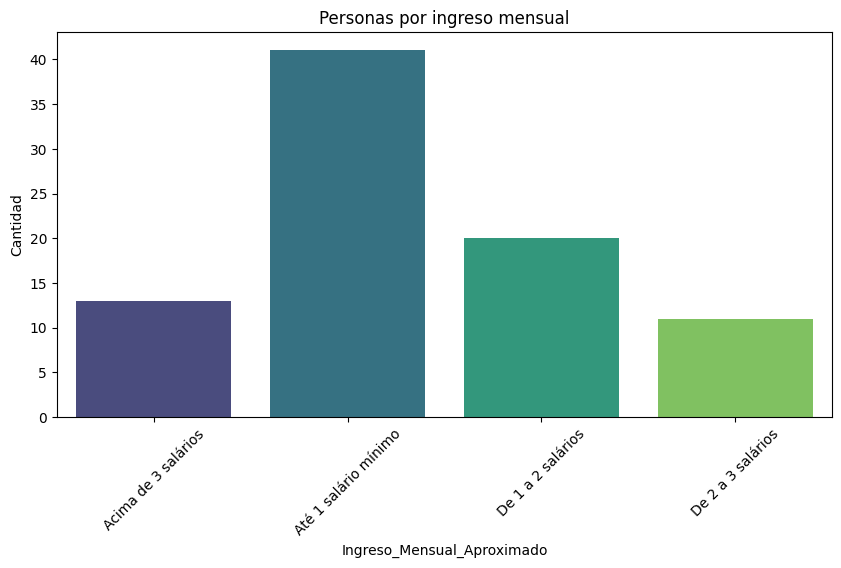

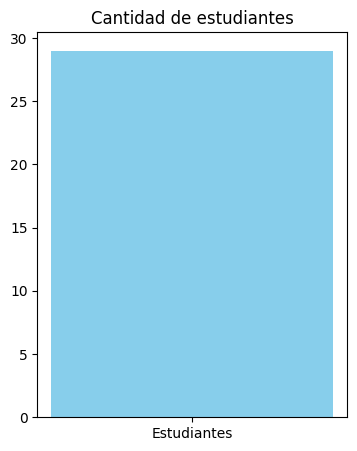

/tmp/ipython-input-1934622949.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compra_por_edad, x="Rango_Edad", y="Cant_Compradores", palette="coolwarm")


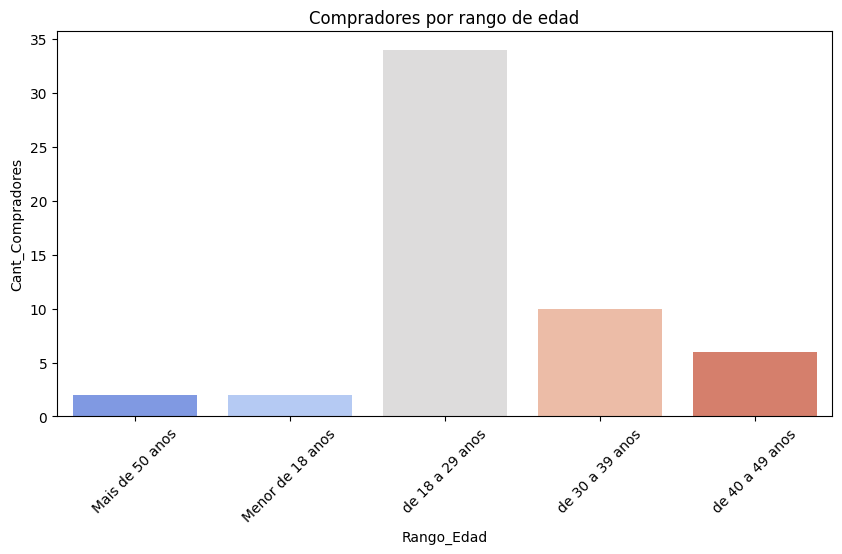

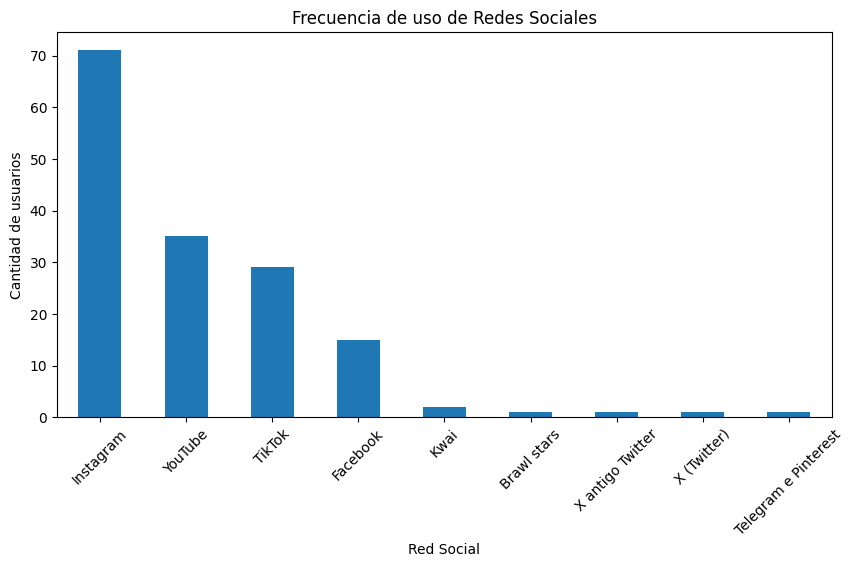

/tmp/ipython-input-1934622949.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compra_por_sexo, x="Sexo", y="Cant_Compradores", palette="Set2")


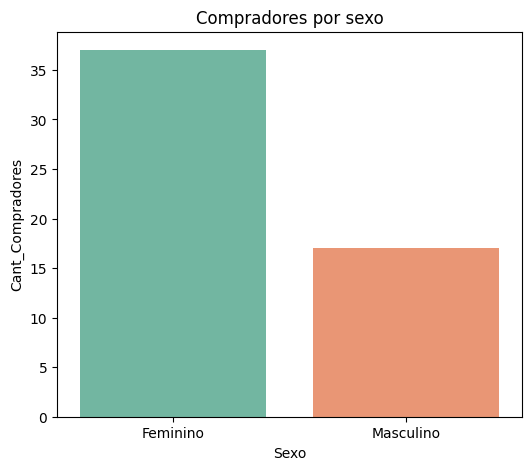

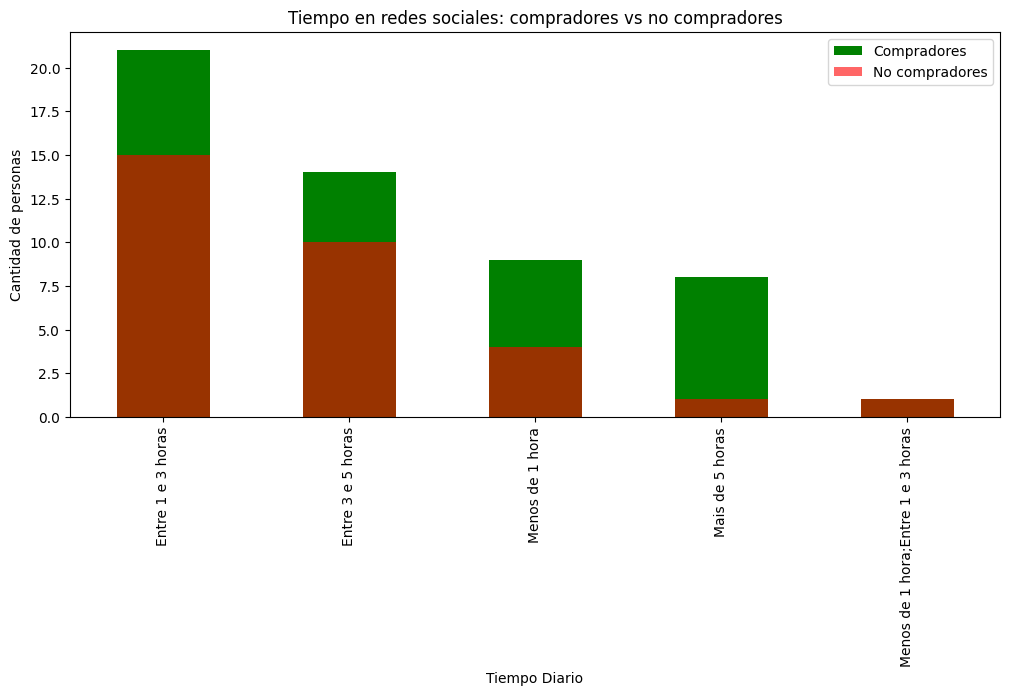

/tmp/ipython-input-1934622949.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=influencia_anuncios, x="Anuncios_Adaptados_Comportamiento", y="Prob_Compra", palette="cubehelix")


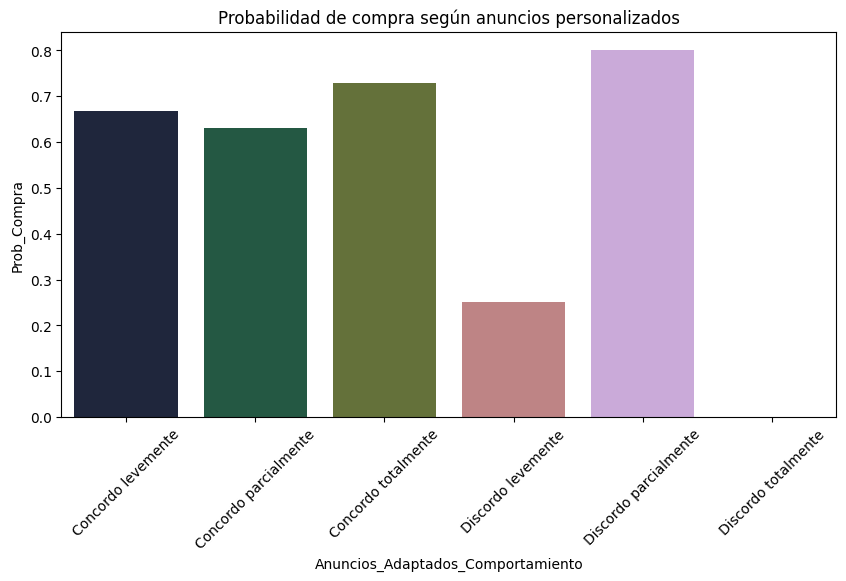

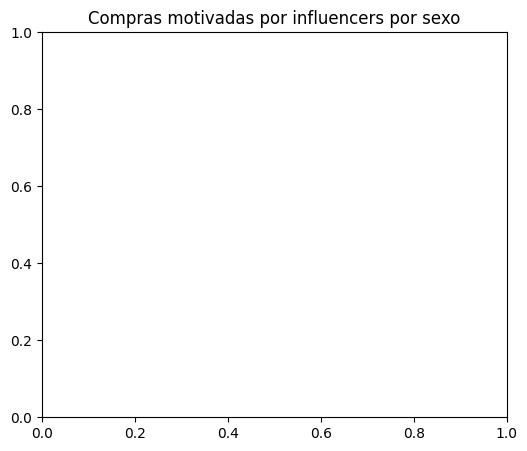

In [96]:
# ==========================================================
# GRAFICA 1: Personas por ingreso mensual
# ==========================================================
plt.figure(figsize=(10,5))
sns.barplot(data=conteo_ingresos, x="Ingreso_Mensual_Aproximado", y="Cantidad", palette="viridis")
plt.title("Personas por ingreso mensual")
plt.xticks(rotation=45)
plt.show()


# ==========================================================
# GRAFICA 2: Estudiantes
# ==========================================================
plt.figure(figsize=(4,5))
plt.bar(["Estudiantes"], [num_estudiantes], color='skyblue')
plt.title("Cantidad de estudiantes")
plt.show()


# ==========================================================
# GRAFICA 3: Rango de edad que compra más
# ==========================================================
plt.figure(figsize=(10,5))
sns.barplot(data=compra_por_edad, x="Rango_Edad", y="Cant_Compradores", palette="coolwarm")
plt.title("Compradores por rango de edad")
plt.xticks(rotation=45)
plt.show()


# ==========================================================
# GRAFICA 4: Redes sociales más usadas
# ==========================================================

plt.figure(figsize=(10,5))
conteo_redes.plot(kind='bar')
plt.title('Frecuencia de uso de Redes Sociales')
plt.xlabel('Red Social')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=45)
plt.show()

# ==========================================================
# GRAFICA 5: Compradores por sexo
# ==========================================================
plt.figure(figsize=(6,5))
sns.barplot(data=compra_por_sexo, x="Sexo", y="Cant_Compradores", palette="Set2")
plt.title("Compradores por sexo")
plt.show()


# ==========================================================
# GRAFICA 6: Tiempo en redes: compradores vs no compradores
# ==========================================================
plt.figure(figsize=(12,5))
promedio_tiempo_compradores.plot(kind='bar', color='green', label='Compradores')
promedio_tiempo_no_compradores.plot(kind='bar', color='red', alpha=0.6, label='No compradores')
plt.title("Tiempo en redes sociales: compradores vs no compradores")
plt.xlabel("Tiempo Diario")
plt.ylabel("Cantidad de personas")
plt.legend()
plt.show()


# ==========================================================
# GRAFICA 7: Influencia de anuncios personalizados
# ==========================================================
plt.figure(figsize=(10,5))
sns.barplot(data=influencia_anuncios, x="Anuncios_Adaptados_Comportamiento", y="Prob_Compra", palette="cubehelix")
plt.title("Probabilidad de compra según anuncios personalizados")
plt.xticks(rotation=45)
plt.show()


# ==========================================================
# GRAFICA 8: Compras por influencers según sexo
# ==========================================================
plt.figure(figsize=(6,5))
sns.barplot(data=compras_influencers_sexo, x="Sexo", y="Cantidad", palette="Accent")
plt.title("Compras motivadas por influencers por sexo")
plt.show()